In [3]:
import sys
import os
import warnings
import platform

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

print(f"My Python version is: {platform.python_version()}")
print(f"My Numpy version is: {np.__version__}")
print(f"My Pandas version is: {pd.__version__}")
print(f"My Seaborn version is: {sns.__version__}")

My Python version is: 3.13.2
My Numpy version is: 2.2.3
My Pandas version is: 2.2.3
My Seaborn version is: 0.13.2


# Practical 2: Pokemon

>Objective of this practical:
>
>You are selected to compete at the Pokémon World Champion Ships Master Tournament! Which pokemons do you need to be the best pokemon coach? Get in the mood with this [song](https://www.youtube.com/watch?v=JuYeHPFR3f0)!

## Basic inspection

Before you can do anything you need to load the dataset into memory. Get the dataset from Brightspace: pokemon_patch1.tsv

### Assignment 0: load data

The data is stored in a .tsv file. It is a tab-separated values file (tab is "\t" in Python and most other major programming languages). You can open the file with Notepad(++) to inspect the contents before you read it in. It is also available [here](https://raw.githubusercontent.com/BWM146/Datasets/master/pokemon_patch1.tsv). To make it easier for yourself, make sure to have your python script in the same directory as your data file. This make it easy to always load in your data in the same way using the `os` module.

- **Make sure your files are in the right directory and specify the `file_name` and `path`.**
```python
import os
file = "pokemon_patch1.tsv"
path = os.getcwd() # returns a string towards your current directory, e.g. "C:/Documents/Big_data/practical_2"
file_loc = os.path.join(path, file) # "C:/Documents/Big_data/practical_2/pokemon_patch1.tsv"
df = pd.read_csv(file_loc, ...)
```
- **Load the data as df_pokemon into Python using the ``.read_csv()`` [\[docs\]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function (this time you need to specify the delimiter).**
- **Print the head of the data.**
````{margin}
```{admonition} Tip
:class: tip
For the last exercise you can either use a boolean index or use ``.set_index()`` and ``.loc``.
```
````
- **Everyone has a favorite Pokemon, try to find yours in the data. If you don't have one, ask Matthias for his.** 

You should get something like this:

In [4]:
import os
file = "pokemon_patch1.tsv"
path = os.getcwd() 
file_loc = os.path.join(path, file)

df_pokemon = pd.read_csv(file_loc, sep="\t")
print(df_pokemon.head(), "\n")  # print with extra newline for readability
print(df_pokemon.set_index("Name").loc[["Caterpie"], :], "\n")  # alternatively use a boolean index
print(df_pokemon[df_pokemon["Name"] == "Pikachu"])  # boolean index

   Unnamed: 0    #                  Name  HP  Attack  Defense  Sp. Atk  \
0           0  127                Seadra  55      65       95       95   
1           1  675               Cubchoo  55      70       40       60   
2           2  431  Deoxys Defense Forme  50      70      160       70   
3           3  288               Linoone  78      70       61       50   
4           4  749               Honedge  45      80      100       35   

   Sp. Def  Speed  Generation  Legendary  Version        Types  
0       45     85           1      False  Patch 1        Water  
1       40     40           5      False  Patch 1          Ice  
2      160     90           3       True  Patch 1      Psychic  
3       61    100           3      False  Patch 1       Normal  
4       37     28           6      False  Patch 1  Steel-Ghost   

          Unnamed: 0   #  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
Name                                                                     
Caterpie       

We have a:
- \# column with the Pokemon number (unique identifier, not exactly in line with National Pokédex but good enough)
- Name column with the Pokemon name
- HP-Speed columns with the stats of the Pokemon (higher is stronger)
- Generation column for when they were added to the game
- Legendary column to indicate whether it's a legendary Pokemon or not
- Version column to indicate for which patch of the game these stats are
- Types column to indicate what type or types a Pokemon is

What would be a sensible index for this exercise?

### Assignment 1: descriptives

You can do some preliminary inspection of the data. Do you still remember the methods you used in practical 1? Grab the exercises from the previous practical or the cheat-sheet if you can't remember.

- **Display the info of the DataFrame.**

- **Also print the tail of the data.**

- **Describe the content of the columns.**
````{margin}
```{admonition} Tip
:class: tip
look up the ``.unique`` and ``.nunique`` methods
```
````
- **How many unique values are present in the types column?**

In [5]:
print(df_pokemon.info(), "\n")
print(df_pokemon.tail(), "\n")
print(df_pokemon.describe(), "\n")
print(f"Number of unique types = {df_pokemon['Types'].nunique()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  803 non-null    int64 
 1   #           803 non-null    int64 
 2   Name        799 non-null    object
 3   HP          803 non-null    int64 
 4   Attack      803 non-null    int64 
 5   Defense     803 non-null    int64 
 6   Sp. Atk     803 non-null    int64 
 7   Sp. Def     803 non-null    int64 
 8   Speed       803 non-null    int64 
 9   Generation  803 non-null    int64 
 10  Legendary   803 non-null    bool  
 11  Version     803 non-null    object
 12  Types       803 non-null    object
dtypes: bool(1), int64(9), object(3)
memory usage: 76.2+ KB
None 

     Unnamed: 0    #      Name   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
798         798  662     Klang   60      80       95       70       85     50   
799         799  578  Musharna  116      55       85      107     

There are some observations that can be made based on these data:
- There appear to be some weird values, 900 HP seems a bit much, we should probably look into that. 

- We also have no idea how many missing values are present in each column. 

- There is some whitespace in the column-names. It would be nice to remove those so we don't hit any errors related to that.

### Assignment 2: setting the index

Let's set a more sensible index first and let's make sure we have our DataFrame sorted. 

- **Set the # column as the index for your DataFrame.**

- **Sort the DataFrame by your index (look up ``.sort_index()``) and print the first 10 rows.**

You should get something like this

In [6]:
df_pokemon.drop('Unnamed: 0', axis=1, inplace=True)
df_pokemon.set_index("#", inplace=True)
df_pokemon.sort_index(inplace=True)
df_pokemon.head(10)

,Name,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Version,Types
#,,,,,,,,,,,
1,NaN,45,49,49,65,65,45,1,False,Patch 1,Grass-Poison
2,NaN,60,62,63,80,80,60,1,False,Patch 1,Grass-Poison
3,NaN,80,82,83,100,100,80,1,False,Patch 1,Grass-Poison
4,Mega Venusaur,80,100,123,122,120,80,1,False,Patch 1,Grass-Poison
5,Charmander,39,52,43,60,50,65,1,False,Patch 1,Fire
6,Charmeleon,58,64,58,80,65,80,1,False,Patch 1,Fire
7,Charizard,78,84,78,109,85,100,1,False,Patch 1,Fire-Flying
8,Mega Charizard X,78,130,111,130,85,100,1,False,Patch 1,Fire-Dragon
9,Mega Charizard Y,78,104,78,159,115,100,1,False,Patch 1,Fire-Flying


With the Pokemon number (not exactly the pokemon number as it also includes the megavolutions) as the index and the Pokemon sorted by number the DataFrame already looks a lot nicer. Minus the Mega versions of Pokemon most of these names should ring a bell if you watched the anime as a kid. It appears the first three names are missing (you could also tell that from the ``.info()``). We should find out if there are more missing values!

### Assignment 3: whitespaces and missing values

Let's tackle the first two problems (weird and missing values). 

First we should have a look if we have missing data. To do so we can use the ``.isnull()`` method. This method returns a DataFrame with True if the data is missing and false if the data is not missing. We can then use ``.sum()`` (remember that False is 0 and True is 1) to find out how many missing values we have.

- **Please remove the whitespaces in the column names**
- **See how many missing values we have per column, please make use of method chaining**

You should get something like this:

In [7]:
df_pokemon.columns = df_pokemon.columns.str.replace(" ", "")
print(df_pokemon.isnull().sum())

Name          4
HP            0
Attack        0
Defense       0
Sp.Atk        0
Sp.Def        0
Speed         0
Generation    0
Legendary     0
Version       0
Types         0
dtype: int64


Apparently we are missing some names here. 
````{margin}
```{admonition} Tip
:class: tip
Use a boolean array where the ``.isnull()`` values are True
```
````
- **Print out the rows where the names are missing.**

You should get something like this:

In [8]:
print(df_pokemon[df_pokemon["Name"].isnull() == True], "\n\n")  # OR

print(df_pokemon[df_pokemon["Name"].isnull()])  # if not specified, it only selects the True's

   Name  HP  Attack  Defense  Sp.Atk  Sp.Def  Speed  Generation  Legendary  \
#                                                                            
1   NaN  45      49       49      65      65     45           1      False   
2   NaN  60      62       63      80      80     60           1      False   
3   NaN  80      82       83     100     100     80           1      False   
63  NaN  65     105       60      60      70     95           1      False   

    Version         Types  
#                          
1   Patch 1  Grass-Poison  
2   Patch 1  Grass-Poison  
3   Patch 1  Grass-Poison  
63  Patch 1      Fighting   


   Name  HP  Attack  Defense  Sp.Atk  Sp.Def  Speed  Generation  Legendary  \
#                                                                            
1   NaN  45      49       49      65      65     45           1      False   
2   NaN  60      62       63      80      80     60           1      False   
3   NaN  80      82       83     100     100    

It appears we only miss the first three Pokemon and the Pokemon on number 63. We could drop them with ``.dropna()`` but it is only very little work to fill these values. Number 63 appears to be "Primape", you should be able to find out what the first [three](https://en.wikipedia.org/wiki/List_of_generation_I_Pok%C3%A9mon#List_of_Pok%C3%A9mon) are.

- **Fill in the NaNs. Check if we didn't miss anything.**

You should get something like this:

In [9]:
df_pokemon.loc[[1, 2, 3, 63], "Name"] = ["Bulbasaur", "Ivysaur", "Venusaur", "Primeape"]
print(df_pokemon.isnull().sum())

Name          0
HP            0
Attack        0
Defense       0
Sp.Atk        0
Sp.Def        0
Speed         0
Generation    0
Legendary     0
Version       0
Types         0
dtype: int64


## Outliers

In your data inspection you came across some extremely high values. These might be considered as outliers or maybe they were used as missing data in another statistical program (999). 

::::{important}
Deciding whether to leave outliers or to drop them is a sensitive subject, so let's explore our outliers first a bit more with plotting.
::::

There are many different plotting libraries for Python. Each with their own advantages and disadvantages. Some are used for scientific publications, some are used for displaying figures in the browser, some for desktop applications, and some are just abstractions of other libraries to make for faster plotting or to emulate plotting behaviour of, for example, ggplot2. In the current practical, we will handle two plotting libraries:

- For scientific publications the most important library to consider is [matplotlib](https://matplotlib.org/stable/tutorials/introductory/pyplot.html).

- We will also consider [Seaborn](https://seaborn.pydata.org/). Seaborn is used for statistical plotting and has a lot of cool options! It an abstraction layer over matplotlib which means you can use matplotlib to interact with plots from Seaborn. 

- (Lastly, it is good to know that Pandas can also plot your data for you. The plots are usually less pretty but often quicker.  Pandas uses matplotlib under the hood so you can style plots from pandas using matplotlib functions. We will not handle this kind of plotting but you can read the [docs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) and are free to use it.)


<img src="https://matplotlib.org/_images/anatomy1.png" alt="Pokemon logo" width="400"/>

Let's start with matplotlib, it works really intuitive so I will just give you an example of what is possible:

```python
x = np.linspace(0, 2, 100)  # create a variable to plot
plt.figure()  # make a figure
plt.plot(x, 2*x, label='line1')  # plot x (x-axis) vs 2x (y-axis)
plt.plot(x, 3*x, label='line2', color='purple')  # plot some more data
plt.xlabel('some text')  # give it a xlabel
plt.ylabel('other text')  # give it a ylabel
plt.title('This is my title')  # give it a title
plt.legend()  # activate the legend
```

You can of course specify much more, but this is how this looks like:

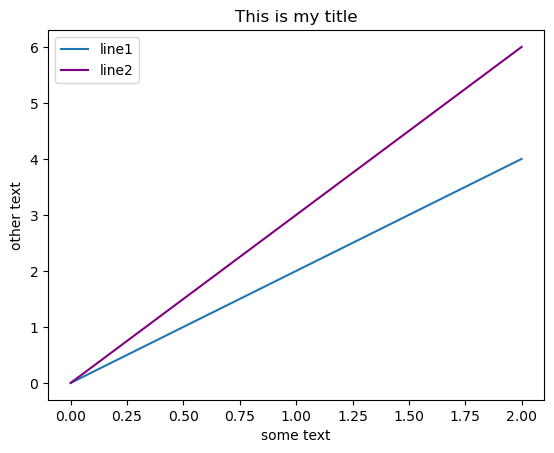

In [10]:
plt.style.use('default')
x = np.linspace(0, 2, 100)  # create a variable to plot
plt.figure()  # make a figure
plt.plot(x, 2*x, label='line1')  # plot x (x-axis) vs 2x (y-axis)
plt.plot(x, 3*x, label='line2', color='purple')  # plot some more data
plt.xlabel('some text')  # give it an xlabel
plt.ylabel('other text')  # give it an ylabel
plt.title('This is my title')  # give it a title
plt.legend()  # activate the legend
plt.show()

Notice that we did not specify anything and the lines are in the same plot. If you want a new figure, simply make a new figure with plt.figure. Line plots are the default in .plot() but besides line-plots, matplotlib provides us with many more options, for example:

- ``plt.hist()``
- ``plt.scatter()``
- ``plt.boxplot()``
- ``plt.bar()``
- and more..

### Assignment 4: Plotting outliers

Now it is your turn, let's do some plotting!
````{margin}
```{admonition} Tip
:class: tip
First reset the index of df_pokemon
```
````
- **Pick a plot [style](https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html) and set the style with ``plt.style.use()``.** 

- **Plot a scatter plot of # vs HP. Specify the label and color parameter**

- **Plot another scatter plot in the same plot of # vs Attack and # vs Defense. Make sure to define unique colors and labels**

- **Add a xlabel and ylabel with fontsize 12. Look in the docs how to specify parameters** 

- **Add a title with fontsize = 20 and use bold font.**

- **Add a legend. Give the legend a title and make sure there is a frame around the legend.**

You should get something like this:
You might need to call ``plt.show()`` to display the results of your efforts.


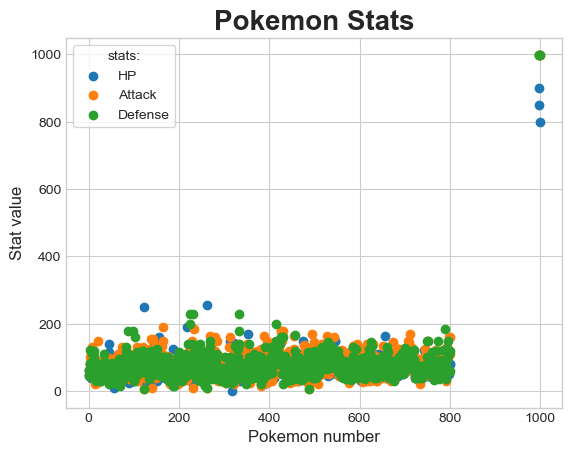

In [11]:
plt.style.use("seaborn-v0_8-whitegrid")
df_pokemon.reset_index(inplace=True)
plt.figure()
plt.scatter(df_pokemon["#"], df_pokemon["HP"], color="C0", label="HP")
plt.scatter(df_pokemon["#"], df_pokemon["Attack"], color="C1", label="Attack")
plt.scatter(df_pokemon["#"], df_pokemon["Defense"], color="C2", label="Defense")
plt.xlabel("Pokemon number", fontsize=12)
plt.ylabel("Stat value", fontsize=12)
plt.title('Pokemon Stats', fontsize=20, weight='bold')
plt.legend(title='stats:', frameon=True)
plt.show()

You made your first plot! As you can see, we clearly have some outliers that we should deal with! We could remove outliers above 400 but for the sake of the exercise, let's assume you want to drop values higher or lower than 2.5 standard deviations from the mean. First, we would have to z-transform our data. Remember the z-distribution below?

<img src="https://upload.wikimedia.org/wikipedia/commons/2/25/The_Normal_Distribution.svg" alt="Pokemon logo" width="600"/>

Feature scaling through standardization (or Z-score normalization) can be an important preprocessing step for many machine learning algorithms. Standardization involves rescaling the features such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one.

While many algorithms (such as SVM, K-nearest neighbors, and logistic regression) require features to be normalized, intuitively we can think of Principle Component Analysis (PCA) as being a prime example of when normalization is important. In PCA we are interested in the components that maximize the variance. If one component (e.g. human height) varies less than another (e.g. weight) because of their respective scales (meters vs. kilos), PCA might determine that the direction of maximal variance more closely corresponds with the ‘weight’ axis, if those features are not scaled. As a change in height of one meter can be considered much more important than the change in weight of one kilogram, this is clearly incorrect.

Z-score normalization is extremely sensitive to outliers, but we can also use it to detect outliers, as we will do in the next exercise. Seems reasonable right? Currently, the distribution of our data looks like this (ouch!):

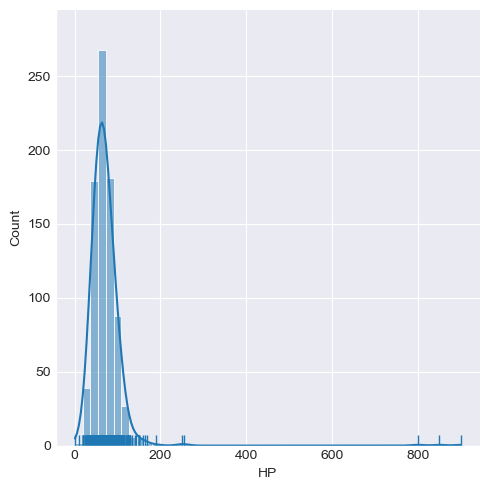

In [12]:
with sns.axes_style("darkgrid"):
    sns.displot(df_pokemon["HP"], kde=True, rug=True, bins=50)

### Assignment 5: normalize data

You should be able to normalize some values by hand. The formula is pretty simple: you take the values in a column and subtract the mean and then divide that by the standard deviation. You might remember that ``.mean()`` and ``.std()`` are readily available on a Pandas object. Below are the columns you want to normalize and create new standardized columns like "HP_z", "Attack_z" etc.

```python
to_norm_cols = ["HP", "Attack", "Defense", "Sp.Atk", "Sp.Def", "Speed"]  # list of columns we want to normalize
```

- **Calculate the z-score for HP and assign it to HP_z**
- **Now do the same for all 'to_norm_cols'. Remember that we do not like code repetition.**
````{margin}
```{admonition} Tip
:class: tip
Play around with the bins parameter, it needs to be relatively high with the current distribution (due to the outliers).
```
````
- **Make a histogram plot of HP_z and make sure to specifiy the 'bins' parameters, what does it do?.**
- **Give your plot a xlabel, ylabel and a title**

You should get something like this:

   #           Name  HP  Attack  Defense  Sp.Atk  Sp.Def  Speed  Generation  \
0  1      Bulbasaur  45      49       49      65      65     45           1   
1  2        Ivysaur  60      62       63      80      80     60           1   
2  3       Venusaur  80      82       83     100     100     80           1   
3  4  Mega Venusaur  80     100      123     122     120     80           1   
4  5     Charmander  39      52       43      60      50     65           1   

   Legendary  Version         Types      HP_z  Attack_z  Defense_z  Sp.Atk_z  \
0      False  Patch 1  Grass-Poison -0.502268 -0.515733  -0.438835 -0.172756   
1      False  Patch 1  Grass-Poison -0.225033 -0.315229  -0.221735  0.056969   
2      False  Patch 1  Grass-Poison  0.144613 -0.006761   0.088408  0.363268   
3      False  Patch 1  Grass-Poison  0.144613  0.270860   0.708694  0.700197   
4      False  Patch 1          Fire -0.613162 -0.469462  -0.531878 -0.249331   

   Sp.Def_z   Speed_z  
0 -0.178088 -0.46865

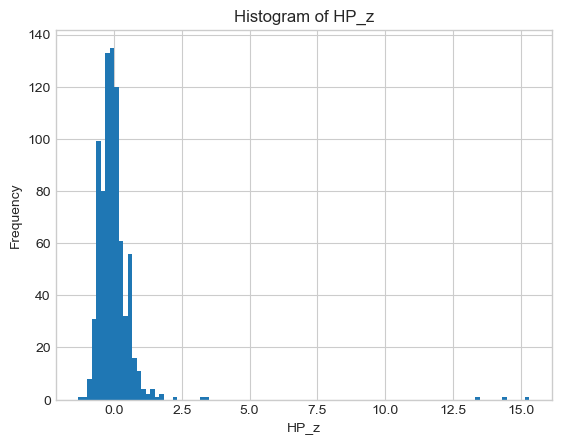

In [13]:
df_pokemon['HP_z'] = (df_pokemon["HP"] - df_pokemon["HP"].mean()) / df_pokemon["HP"].std()

to_norm_cols = ["HP", "Attack", "Defense", "Sp.Atk", "Sp.Def", "Speed"]
for col in to_norm_cols:
    df_pokemon[col + '_z'] = (df_pokemon[col] - df_pokemon[col].mean()) / df_pokemon[col].std()  # z-transform

print(df_pokemon.head())

plt.hist(df_pokemon['HP_z'], bins=100)  # if you don't specify plt.figure() and you dont have an active figure, it gives you a new figure
plt.title('Histogram of HP_z')
plt.xlabel('HP_z')
plt.ylabel('Frequency')
plt.show()


### Assignment 6: identify outliers

Better already, as you can see the data is now centered around 0 with a standard deviation of 1 (test this for yourself). Before we get rid of the outliers, let's inspect these outliers!
````{margin}
```{admonition} Tip
:class: tip
Use a boolean array ``df_pokemon[target_cols].abs() > 2.5``, also use the ``.any()`` and ``.all()`` methods with axis=1. 
```
````
- **Select the rows where the z-score is lower than 2.5 and higher than -2.5 in ANY standardized column. Print the names of these outliers. Try to use method chaining.**

- **Select the rows where the z-score is lower than 2.5 and higher than -2.5 in ALL standardized columns. Print the names of these outliers. Try to use method chaining.**

You should get something like this

In [14]:
target_cols = ["HP_z", "Attack_z", "Defense_z", "Sp.Atk_z", "Sp.Def_z", "Speed_z"]
any_outlier = df_pokemon[(df_pokemon[target_cols].abs() > 2.5).any(axis=1)]
all_outlier = df_pokemon[(df_pokemon[target_cols].abs() > 2.5).all(axis=1)]
print(any_outlier["Name"])    
print(all_outlier["Name"])

121       Chansey
230       Shuckle
261       Blissey
800    L. Forcher
801     R. Jansen
802      M. Kempe
Name: Name, dtype: object
800    L. Forcher
801     R. Jansen
802      M. Kempe
Name: Name, dtype: object


So we identified our outliers, the next step is to see where they are in our just made scatterplot. The bad thing about interactive plotting (what you did in assignment 5) is that it is not possible to get back to your plot afterwards, we did not store it. Interactive plotting is fast and useful for data inspecting. However, object-oriented is often more convenient and looks really similar. Let's remake the scatterplot for HP:

``` python
fig, ax = plt.subplots()  # you made a figure and assigned 'fig' to the figure and 'ax' to the axis object
ax.scatter(df_pokemon["#"], df_pokemon["HP"], color="C0", label="HP")  # we want to plot on the axis object
ax.set_xlabel("Pokemon number", fontsize=12)  # note that this code is slightly different (plt.xlabel() vs ax.set_xlabel())
ax.set_ylabel("Stat value", fontsize=12)
ax.set_title('Pokemon Stats', fontsize=20, weight='bold')
ax.legend(title='stats:', frameon=True)
```

So we have our figure back, now we can annotate our outliers in the plot

### Assignment 7: annotate outliers in plot

- **Make a scatterplot for "HP" vs "#" for all pokemons, using object-oriented plotting**
- **Make a scatterplot for "HP" vs "#" for any outlier, in the same figure but in a different color, still using object-oriented plotting**
- **Look up the documentation for ax.text(). Add the name of M. Kempe to the figure at his x and y coordinates**
````{margin}
```{admonition} Tip
:class: tip
Look at ``df.iterrows()`` which let you run through every row
```
````
- **Do the same for the other outliers from any_outlier, remember we do not like repetition.**

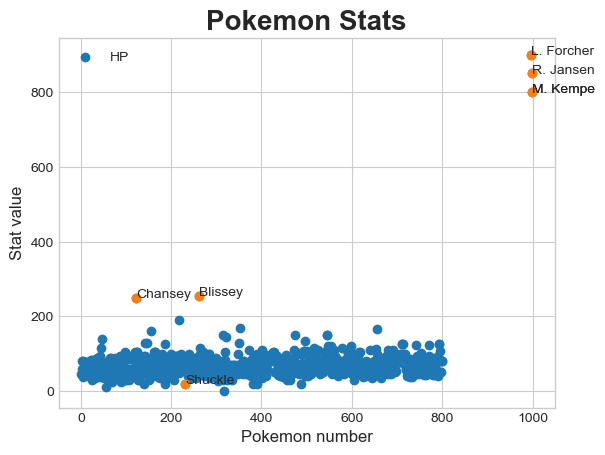

In [15]:
fig, ax = plt.subplots()
ax.scatter(df_pokemon["#"], df_pokemon["HP"], color="C0", label="HP")
ax.set_xlabel("Pokemon number", fontsize=12)
ax.set_ylabel("Stat value", fontsize=12)
ax.set_title('Pokemon Stats', fontsize=20, weight='bold')
ax.legend()

ax.scatter(any_outlier["#"], any_outlier["HP"], color="C1")

Mkempe = all_outlier.set_index('Name').loc['M. Kempe', :]
ax.text(Mkempe["#"], Mkempe["HP"], 'M. Kempe')
for index, row in any_outlier.iterrows():
    ax.text(row["#"], row["HP"], row["Name"])

### Assignment 8: dropping outliers

It appears they were not outliers after all. What actually happened is that the stats for the lecturers got entered into the dataset. No problem, you can just drop those rows. Remember how to use drop?
````{margin}
```{admonition} Tip
:class: tip
This is one of those cases where it's nice to have an index! Get the index labels from your slice with ``.index``. 
```
````
- **Drop the rows containing outliers in all specified columns.**

In [16]:
df_pokemon.drop(all_outlier.index, inplace=True)

This would be the moment when I tell you there is actually a function that can z-transform your data. We need to repeat the process anyways as we have deleted some of our data and need to rescale to our new DataFrame. Most normalization procedures are very sensitive to outliers so it's a good thing that we got rid of them. ``sklearn`` provides two convenient ways to scale your data. You either use the scale function from the preprocessing library or you use the richer StandardScaler utility class. Either way you want to import both:
```python
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
```
With scale you can just plug in the array and you get an array back that we can assign to our DataFrame, as such:
```python
pokemon[target_cols] = scale(pokemon[to_norm_cols])
```
With the StandardScaler you need to use the ``.fit_transform`` method. As it is a utility class you can set a lot of parameters and it also has a few methods. [Classes](https://realpython.com/python3-object-oriented-programming/) are very useful, but maybe somewhat unfamiliar, for this course you just need to know how to use them. If we want to achieve the same thing as we did above we can just initialize the object using ``()`` (this basically "spawns" the object) and then immediately use the ``.fit_transform`` method, as such:

```python
pokemon[target_cols] = StandardScaler().fit_transform(pokemon[to_norm_cols])
```
Note that this does actually 2 things. First, it fits the data (e.g. finds the range, mean and standard deviation). Second, it actually transforms the data from its initual values to the z-scores. The same functionality can thus be obtained by the following lines:

```python
scaler = StandardScaler()
scaler.fit(pokemon[to_norm_cols]) # fitting the data, note that scaler now saves the information about the data
pokemon[target_cols] = scaler.transform(pokemon[to_norm_cols])
```

### Assignment 9: normalizing

- **Normalize the ``to_norm_cols`` to the data that is left in the dataset.**
- **Plot the results.**

You should get something like this:

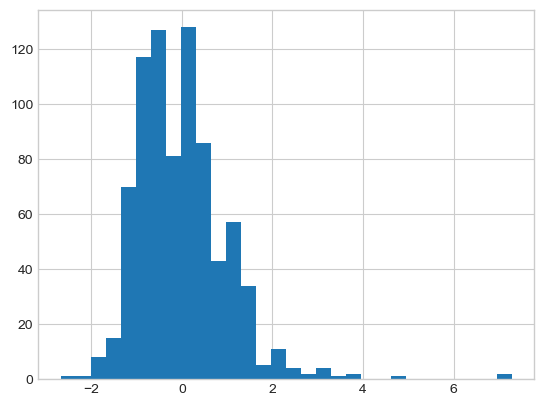

In [17]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

# df_pokemon[target_cols] = scale(df_pokemon[to_norm_cols])  # alternatively use this one
df_pokemon[target_cols] = StandardScaler().fit_transform(df_pokemon[to_norm_cols])
plt.hist(x=df_pokemon['HP_z'], bins=30)
plt.show()

### Assignment 10: distribution

This looks fine for now. Removing the outliers and then retransforming the dataset has quite a bit of impact on the z-scores. The current distribution does not look too troubling though. 

We can get a better grasp of the distribution by using [Kernel Density Estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation). This is a way to estimate the probability density function (PDF) of a random variable in a non-parametric way. Have a look at Chapter 3 of Igual and Segui.

- **From the ``scipy.stats`` module import ``guassian_kde``.**

- **Calculate the kde function for HP using ``my_kde = gaussian_kde(data)``. What does it return? How do you use this?**

- **Fit the function on the range of your data. e.g. ``my_kde(np.linspace(min, max, 200))``.**

- **Plot a histogram of your data and add the kde on top of it.**

- **Get the ``normaltest()`` function from the same module and test whether the HP is normally distributed.**

You should get something like this:


NormaltestResult(statistic=np.float64(304.5376025984999), pvalue=np.float64(7.421639067361935e-67))


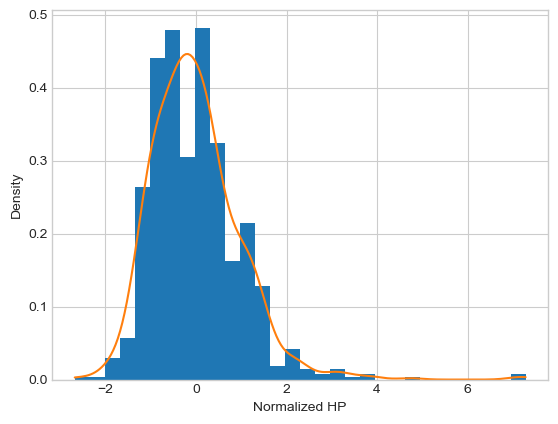

In [18]:
from scipy.stats import gaussian_kde, normaltest

hp = df_pokemon["HP_z"]
density = gaussian_kde(hp)
xgrid = np.linspace(hp.min(), hp.max(), 200)
plt.hist(hp, bins=30, density=True)
plt.plot(xgrid, density(xgrid))

plt.ylabel("Density")
plt.xlabel("Normalized HP")

print(normaltest(hp))
plt.show()

As we already told you, the seaborn library is more for statistical plotting so this would be a good moment to introduce Seaborn to you. Import seaborn on top of your script as sns and have a look at the different plots of [Seaborn](https://seaborn.pydata.org/index.html). Specifically the ``displot()``, look up the docs and find out what this plot does and what the parameters bins and kde do.

- **Import Seaborn** 
- **Use sns.displot to create a similar figure to the one you produced before. That was a lot faster, right?**
- **Give it an x and ylabel by using matplotlib.**

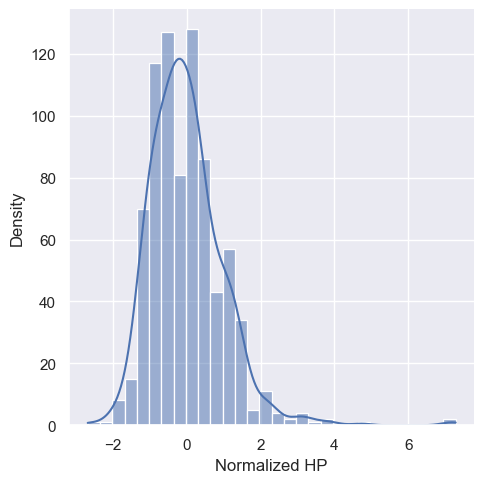

In [19]:
sns.set_theme()
sns.displot(hp, bins=30, kde=True)

plt.xlabel("Normalized HP")
plt.ylabel("Density")
plt.show()

## Calculations (intermediate)

You inspected the data, the outliers and plotted the outcomes. Now it is time to make some interesting calculations! As you know, all pokemons have 2 special stats (special attack and special defense). I would like to combine them and calculate one special for every pokemon, independent of Legendary. For this special score we have to define our own function (Pandas does not have a ```.special()``` method) like we did in the pre-course assignment. ```.calc_special()``` takes three arguments: Sp.Atk (int), Sp.Def (int) and Legendary (bool).


You multiply the Sp.Atk and Sp.Def with a coefficient:
```python
coef_leg = [4.1865, 5.7431]
coef_not_leg = [3.4581, 4.6812]
```

The special formula is 
$special = \frac{Sp.Atk * C_{1}^{3} + Sp.Def * C_{2}^{2}}{100}$

Where $C_{1}$ refers to the first coefficient and $C_{2}$ to the second coefficient in the list.

### Assignment 11: define function

- **implement the special formula and check Charmander and Moltres if it worked and you get the same outcomes as us**

Remember how to make a function? We will give you a head start:
```python
def calc_special(sp_atk, sp_def, legendary):
    """
    A function to calculate the combined special stat.
    
    Args:
        sp_atk (int): The value for the special attack.
        sp_def (int): The value for the special defense.
        legendary (bool): Whether the pokemon is legendary or not.
    
    Returns:
        float: The combined special stat of the pokemon
    """
    coeff_leg = [4.4581, 4.6812]
    coeff_not_leg = [4.5253, 5.6831]
    ...
    ...
    ...
    return special
```


```{admonition} Tip
:class: tip
See the docstrings in the function? They clearly explain what the input should be, what the function does and what the output is of the function. Save your future self some time and **always** write docstrings for functions. 
```


You should get something like this:

In [20]:
def calc_special(sp_atk, sp_def, legendary):
    """
    A function to calculate the combined special stat.
    
    Args:
        sp_atk (int): The value for the special attack.
        sp_def (int): The value for the special defense.
        legendary (bool): Whether the pokemon is legendary or not.
    
    Returns:
        float: The combined special stat of the pokemon
    """
    coeff_leg = [4.4581, 4.6812]
    coeff_not_leg = [4.5253, 5.6831]
    c = coeff_leg if legendary else coeff_not_leg  # same as if legendary == True but it automatically assumes it is True

#     if legendary == True:    # same as above
#        c = coeff_leg
#     else
#        c = coeff_not_leg
    
    special = (sp_atk * c[0]**3 + sp_def * c[1]**2)/100

    return special

Charmander = df_pokemon.set_index('Name').loc['Charmander', ['Sp.Atk', 'Sp.Def', 'Legendary']]
Moltres = df_pokemon.set_index('Name').loc['Moltres', ['Sp.Atk', 'Sp.Def', 'Legendary']]

print(f"Charmander has a special score of {calc_special(Charmander['Sp.Atk'], Charmander['Sp.Def'], Charmander['Legendary']):.2f}.")
print(f"Moltres has a special score of {calc_special(Moltres['Sp.Atk'], Moltres['Sp.Def'], Moltres['Legendary']):.2f}.")

Charmander has a special score of 71.75.
Moltres has a special score of 129.38.


If we want to use a function on the whole DataFrame, the most performant way to do this is by using the ```.apply()``` method. Because our function takes three arguments, we will need to use a lambda function. Consider the following example:

```python
def calc_sum(hp, attack, defense)
    return hp + attack + defense

df_pokemon['total_score'] = df_pokemon.apply(lambda row: calc_sum(row['HP'], row['Attack'], row['Defense']), axis=1)
```

Let's break it down:

```python
apply - apply method on dataframe
lambda - this is an anonymous function
row - the parameter name within the function
calc_sum - our defined function
row['HP'] - indexes the HP column
axis=1 - part of the apply method --> applys the function on every row (alternatively on every columns with axis=0)
```

So, the ```.apply()``` method is going through every record (row since axis=1) one-by-one in the DataFrame. We named the record row (this can be anything) and put it directly after lambda, which is a convention that is often used. We bother with apply because it is much faster than using conventional for-loops (you can always check it with the python %%time it comments you learned).

### Assignment 12: apply function

- **```.apply()``` you just defined function (calc_special) to df_pokemon using a lambda function**
- **Print out the top 5 pokemons with the highest combined special attack/defense!**

You should get something like this:

In [21]:
df_pokemon["special"] = df_pokemon.apply(lambda row: calc_special(row['Sp.Atk'], row['Sp.Def'], row['Legendary']), axis=1)

top_pokemons = df_pokemon[["Name", "special", "Sp.Atk", "Sp.Def","Legendary"]].sort_values("special", ascending=False)
print(top_pokemons.head(5), "\n")

               Name     special  Sp.Atk  Sp.Def  Legendary
164   Mega Mewtwo Y  198.186572     194     120       True
306  Mega Gardevoir  196.508338     165     135      False
422   Primal Kyogre  194.547577     180     160       True
71    Mega Alakazam  192.856351     175      95      False
196   Mega Ampharos  188.433932     165     110      False 



## Melting and pivoting data

Oftentimes we need our data in a Tidy format, you learned what Tidy data is in the lecture. To learn more about this format you can read the paper on Nestor.

To get our data in a long format we can use ``.melt()``. The top-level ``melt()`` function and the corresponding ``DataFrame.melt()`` are useful to massage a DataFrame into a format where one or more columns are identifier variables, while all other columns, considered measured variables, are “unpivoted” to the row axis, leaving just two non-identifier columns, “variable” and “value”. The names of those columns can be customized by supplying the var_name and value_name parameters. This image illustrates what happens when you melt a DataFrame:

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/reshaping_melt.png" alt="Pokemon logo" width="600"/>

### Assignment 13: melting

First let's drop some of the rows that we don't need to reduce the complexity of this exercise.

```python
to_drop = ['HP_z', 'Attack_z', 'Defense_z', 'Sp_Atk_z', 'Sp_Def_z', 'Speed_z', 'Types']
```
- **Drop these and print the head. Alternatively take the columns you need and assign it to a new dataframe.**

You should get something like this:

In [22]:
to_drop = ['HP_z', 'Attack_z', 'Defense_z', 'Sp.Atk_z', 'Sp.Def_z', 'Speed_z', 'Types']
df_pokemon.drop(to_drop, axis=1, inplace=True)
df_pokemon.head()

,#,Name,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation,Legendary,Version,special
0,1,Bulbasaur,45,49,49,65,65,45,1,False,Patch 1,81.229368
1,2,Ivysaur,60,62,63,80,80,60,1,False,Patch 1,99.974606
2,3,Venusaur,80,82,83,100,100,80,1,False,Patch 1,124.968258
3,4,Mega Venusaur,80,100,123,122,120,80,1,False,Patch 1,151.815322
4,5,Charmander,39,52,43,60,50,65,1,False,Patch 1,71.751192


````{margin}
```{admonition} Tip
:class: tip
Melting and sorting the data can be done by method chaining!
```
````
- **Now melt the "stats" columns of the DataFrame with ``.melt()``. Sort by name and print the head. (stats columns are the HP, Attack, Defense, Sp.Atk, Sp.Df and Speed)** 

In [23]:
df_pokemon_melted = df_pokemon.melt(["Name", "#", "Generation", "Version", "Legendary"]).sort_values("Name")
df_pokemon_melted.head()

,Name,#,Generation,Version,Legendary,variable,value
4510,Abomasnow,511,4,Patch 1,False,Speed,60.000000
510,Abomasnow,511,4,Patch 1,False,HP,90.000000
5310,Abomasnow,511,4,Patch 1,False,special,112.709964
2910,Abomasnow,511,4,Patch 1,False,Sp.Atk,92.000000
1310,Abomasnow,511,4,Patch 1,False,Attack,92.000000


### Assignment 14: unmelting

You could argue that these variables need to be in seperate columns. We can 'unmelt' the variable DataFrame by calling ``.pivot`` on the DataFrame.
![image](https://pandas.pydata.org/pandas-docs/stable/_images/reshaping_pivot.png)

- **Try this out and see what it returns.**

You should get something like this:

In [24]:
df_pokemon_melted.pivot(index="Name", columns="variable", values="value").head()

variable,Attack,Defense,HP,Sp.Atk,Sp.Def,Speed,special
Name,,,,,,,
Abomasnow,92.0,75.0,90.0,92.0,85.0,60.0,112.709964
Abra,20.0,15.0,25.0,105.0,55.0,90.0,115.067858
Absol,130.0,60.0,65.0,75.0,60.0,75.0,88.881550
Accelgor,70.0,40.0,80.0,100.0,60.0,145.0,112.049208
Aegislash Blade Forme,150.0,50.0,60.0,150.0,50.0,60.0,155.154761


We have a bit of a special case here as we have multiple columns that were not pivotted. If you encounter this you can use the ``.pivot_table()`` method. Here you can pass a list as an index, in our case:
```python
pivot_indices = ["Name", "#", "Generation", "Version", "Legendary"]
```
Just make sure you ``.reset_index()`` after.

- **Try this out and print the head.**

You should get something like this:

In [25]:
df_pokemon_melted.pivot_table(index=["Name", "#", "Generation", "Version", "Legendary"], 
                           values="value", columns="variable").reset_index().head()

variable,Name,#,Generation,Version,Legendary,Attack,Defense,HP,Sp.Atk,Sp.Def,Speed,special
0,Abomasnow,511,4,Patch 1,False,92.0,75.0,90.0,92.0,85.0,60.0,112.709964
1,Abra,69,1,Patch 1,False,20.0,15.0,25.0,105.0,55.0,90.0,115.067858
2,Absol,393,3,Patch 1,False,130.0,60.0,65.0,75.0,60.0,75.0,88.881550
3,Accelgor,679,5,Patch 1,False,70.0,40.0,80.0,100.0,60.0,145.0,112.049208
4,Aegislash Blade Forme,751,6,Patch 1,False,150.0,50.0,60.0,150.0,50.0,60.0,155.154761


## More descriptives

Let's do some basic statistics regarding these Pokemon:

### Assignment 15: more descriptives and seaborn

The stats that we are interested are these:

```python
stats = ['HP', 'Attack', 'Defense', 'special']
```

- **Find out the mean HP, Attack, and Defense for legendary vs non-legendary Pokemon. Remember the ```.groupby()``` method?**

- **Do the same, but additionally split it up per generation.**

You should get something like this:

In [26]:
stats = ['HP', 'Attack', 'Defense', 'special']
print(df_pokemon.groupby("Legendary")[stats].mean())
print(df_pokemon.groupby(["Generation", "Legendary"])[stats].mean())

                  HP      Attack    Defense     special
Legendary                                              
False      67.182313   75.669388  71.559184   85.687793
True       92.738462  116.676923  99.661538  131.474448
                              HP      Attack     Defense     special
Generation Legendary                                                
1          False       64.612500   74.981250   70.175000   86.065448
           True        98.000000  120.833333   89.166667  147.357048
2          False       69.613861   70.693069   72.118812   82.732810
           True       103.400000   99.000000   99.000000  113.925876
3          False       64.626761   76.971831   69.901408   85.598125
           True        81.666667  118.333333  107.222222  136.695676
4          False       69.740741   79.620370   75.074074   90.277274
           True       100.846154  109.846154  103.538462  125.605066
5          False       69.353333   78.246667   70.486667   83.913961
           True  

Lets explore the seaborn package a bit more, remember our objective?

>Objective of this practical:
>
>You are selected to compete at the Pokémon World Champion Ships Master Tournament! Which pokemons do you need to be the best pokemon coach?

```{admonition} Tip
:class: tip
Please look up the docs for a barplot. Look especially at the 'hue' parameter, what does it do?
```
- **Plot the mean HP for each Generation and seperately for Legendary in a barplot.**

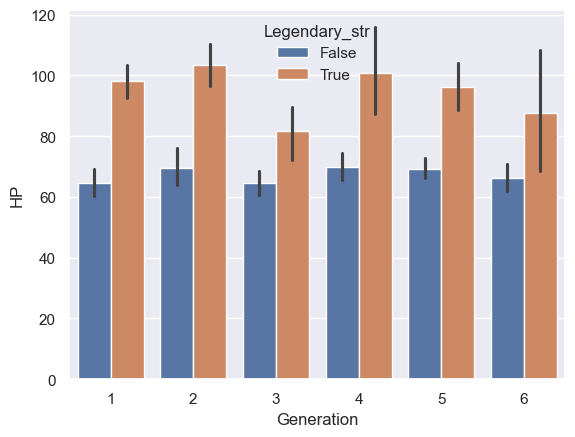

In [27]:
df_pokemon["Legendary_str"] = df_pokemon["Legendary"].astype(str)

sns.barplot(data=df_pokemon, x='Generation', y="HP", hue='Legendary_str')
plt.show()

````{margin}
```{admonition} Tip
:class: tip
Method chaining!
```
````
- **Find the highest health (=HP) Pokemon for each generation.**

You should get something like this:

In [28]:
df_pokemon.sort_values(["HP"], ascending=False).drop_duplicates("Generation").sort_values("Generation")

,#,Name,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation,Legendary,Version,special,Legendary_str
121,122,Chansey,250,5,5,35,105,50,1,False,Patch 1,66.347228,False
261,262,Blissey,255,10,10,75,135,55,2,False,Patch 1,113.104769,False
351,352,Wailord,170,90,45,90,45,60,3,False,Patch 1,97.937501,False
473,474,Drifblim,150,80,44,90,54,80,4,False,Patch 1,100.844287,False
655,656,Alomomola,165,75,80,40,45,65,5,False,Patch 1,51.602184,False
792,793,Xerneas,126,131,95,131,98,99,6,True,Patch 1,137.545556,True


Let's try another cool plot from the seaborn library, please look at the docs of a swarmplot.

- **Try to see if there is [power-creep](https://en.wikipedia.org/wiki/Glossary_of_video_game_terms#Power_creep) between generations. Use swarmplot from the seaborn library to plot the Pokemon attack per generation and make sure to highlight the Legendary pokemons.**

<Axes: xlabel='Generation', ylabel='Attack'>

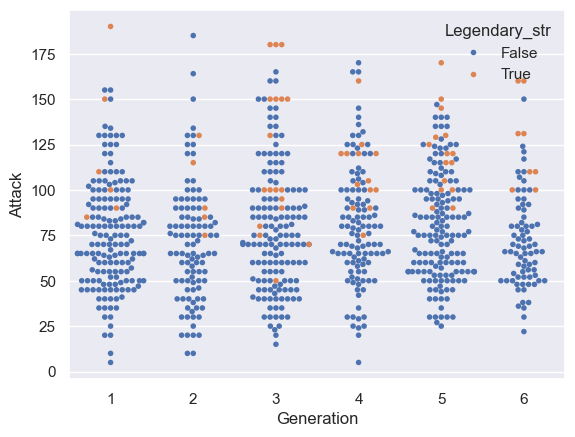

In [29]:
sns.swarmplot(x="Generation", y="Attack", data=df_pokemon, hue='Legendary_str', size=4.)

You sure have a feeling now who you should take to the World Championship! Good luck, prepare yourself mentally by looking how Ash [wins](https://www.youtube.com/watch?v=M0DYQLSMkGk)!

As a reward, you can look at this cute picture!


```{admonition} Click here!
:class: tip, dropdown
<img src="https://www.pngall.com/wp-content/uploads/5/Cute-Pikachu-PNG-Image.png" alt="cute pika" width="200"/>
```